In [1]:
# import data from grocerydb.csv
# into pandas dataframe

import pandas as pd
import os
import sys
import csv
import json


# check if grocerydb.csv exists
if not os.path.exists('grocerydb.csv'):
    print("grocerydb.csv not found")
    sys.exit(1)

# read grocerydb.csv into pandas dataframe
df = pd.read_csv('grocerydb.csv', encoding='utf-8', dtype=str)
df

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.81525,3.0,5.29,0.043984147,396.893,5.050505051,3.03030303,12.12121212,9.090909091,0.0,0.080808081,0.01010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.81525,3.0,5.29,0.043984147,396.893,5.050505051,3.03030303,12.12121212,9.090909091,0.0,0.080808081,0.01010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219444,3.0,2.79,0.055973209,90.7184,1.098901099,0.549450549,13.18681319,7.692307692,2.197802198,0.010989011,0.0
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451055556,0.0,2.49,0.019213302,90.7184,5.494505495,7.692307692,15.38461538,8.791208791,3.296703297,0.0,0.0
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773518519,3.0,4.99,0.017781331,396.893,3.03030303,1.01010101,14.14141414,6.060606061,2.02020202,0.050505051,0.005050505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,"Sam's Choice Creamy Honey Almond Butter, 12 oz",Walmart,spread-squeeze,Sam's Choice,0.503962963,2.0,4.98,0.002465466,340.194,18.75,50.0,25.0,6.25,9.375,0.203125,0.0
26246,"Nutella and Go Snack Packs, Hazelnut Spread & ...",Walmart,spread-squeeze,Nutella,0.738611111,3.0,4.98,NaN,NaN,7.407407407,24.07407407,66.66666667,40.74074074,3.703703704,0.0,0.011111111
26247,"Sabra Dark Chocolate Dessert Dip & Spread, 8 oz",Walmart,spread-squeeze,Sabra,0.829611111,3.0,NaN,NaN,226.796,3.571428571,16.07142857,35.71428571,21.42857143,3.571428571,0.142857143,0.0
26248,"MaraNatha, No Stir Peanut Butter, 1.15 oz Packets",Walmart,spread-squeeze,MaraNatha,0.609444444,2.0,0.78,0.003827995,32.601925,25.0,53.125,15.625,3.125,6.25,0.203125,0.0


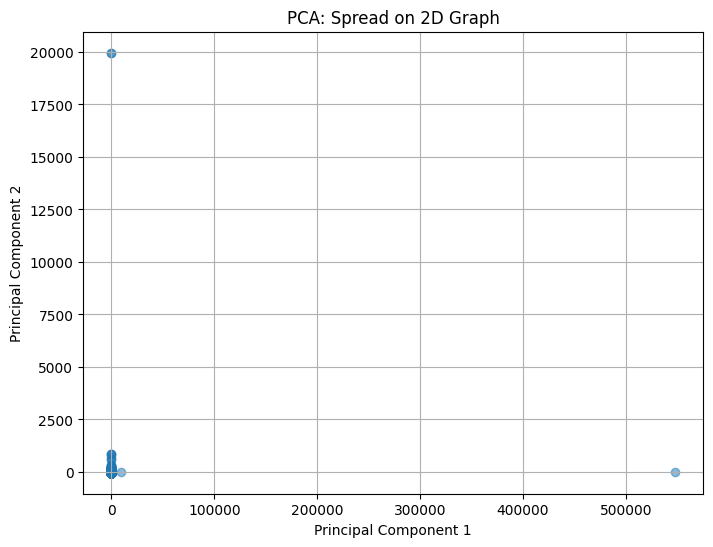

In [2]:
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt

# Convert relevant columns to numeric, handling non-numeric data
numeric_columns = ['Protein', 'Total Fat', 'Carbohydrate', 'Sugars, total', 'Fiber, total dietary', 'Sodium', 'Cholesterol']
df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

# Plot the spread on a 2D graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA: Spread on 2D Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

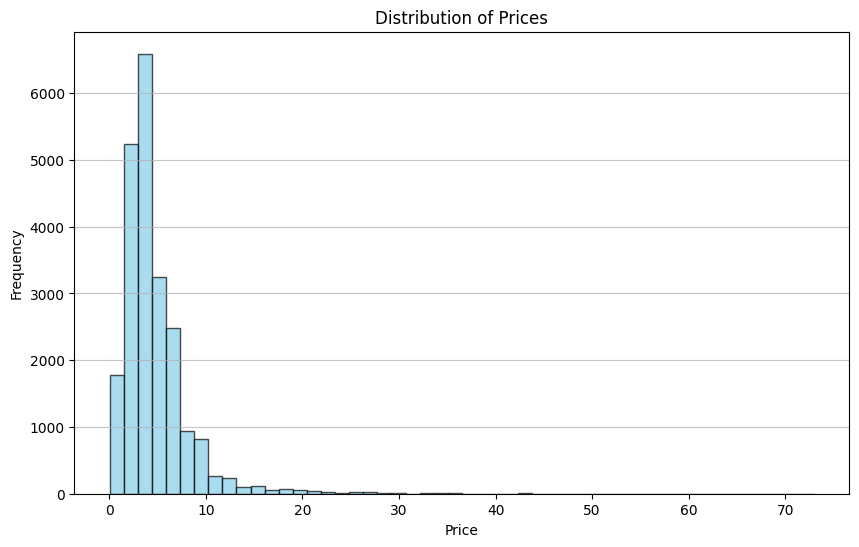

In [3]:
# produce an interesting visualization of the original data
# Visualize the distribution of prices in the dataset
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert price to numeric
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


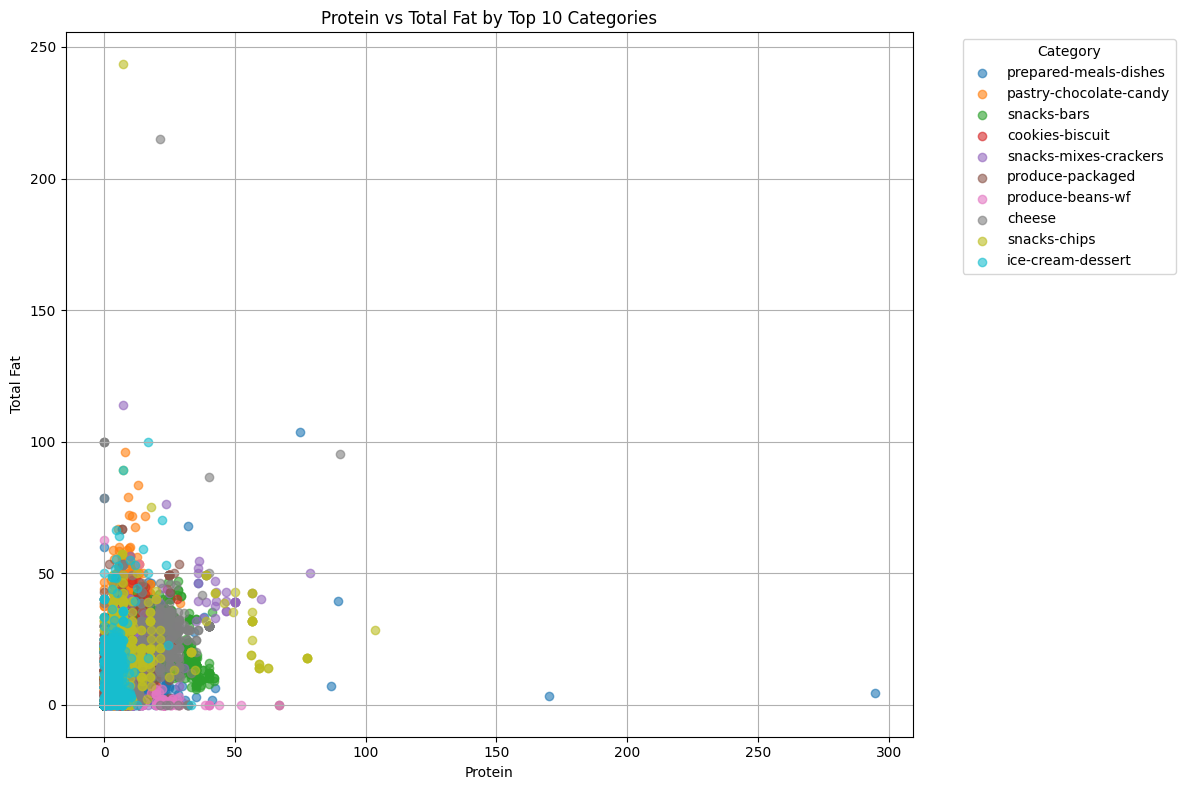

In [10]:
# Scatter plot of Protein vs Total Fat, colored by top 10 categories by number of points
plt.figure(figsize=(12, 8))

# Calculate the top 10 categories by number of points
top_10_numerous_categories = df['category'].value_counts().head(10)

top_10_numerous_categories_list = top_10_numerous_categories.index.tolist()
filtered_df = df[df['category'].isin(top_10_numerous_categories_list)]

for category in top_10_numerous_categories_list:
    subset = filtered_df[filtered_df['category'] == category]
    plt.scatter(
        pd.to_numeric(subset['Protein'], errors='coerce'),
        pd.to_numeric(subset['Total Fat'], errors='coerce'),
        label=category,
        alpha=0.6
    )

plt.title('Protein vs Total Fat by Top 10 Categories')
plt.xlabel('Protein')
plt.ylabel('Total Fat')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

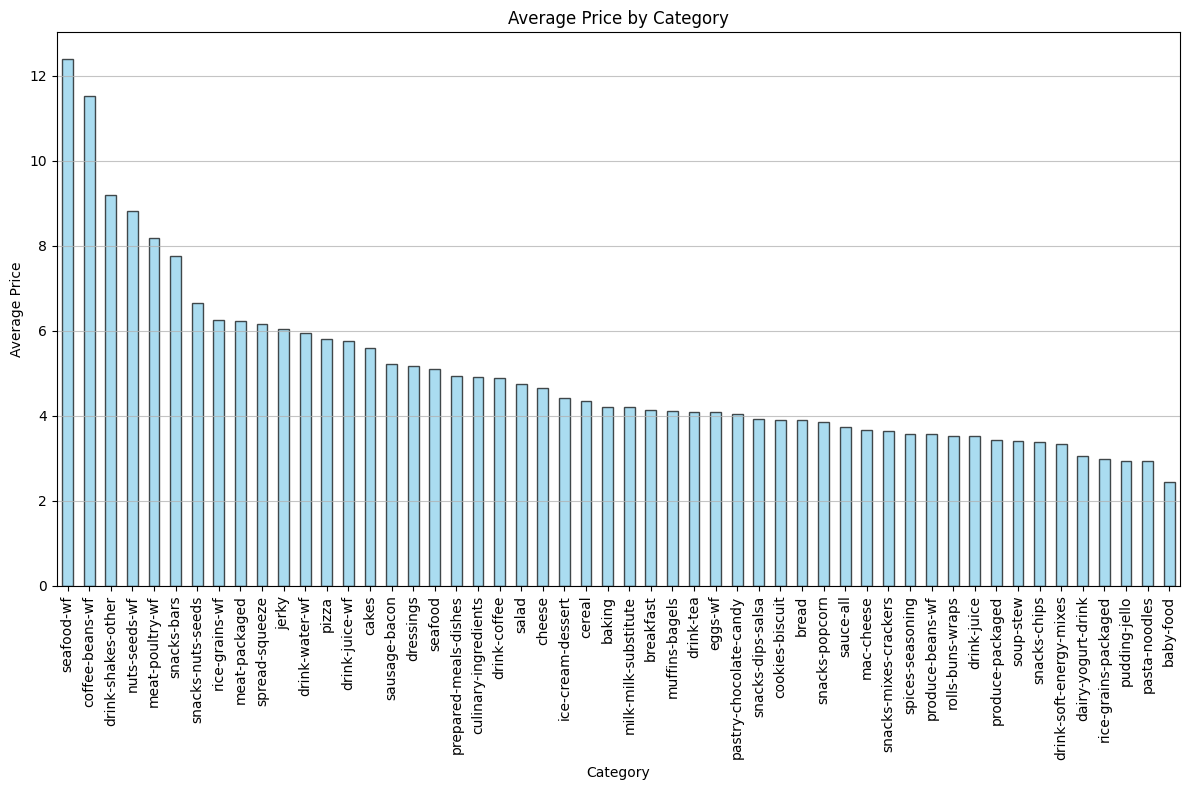

In [5]:
# Calculate the average price by category
avg_price_by_category = df.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot the average price by category
plt.figure(figsize=(12, 8))
avg_price_by_category.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

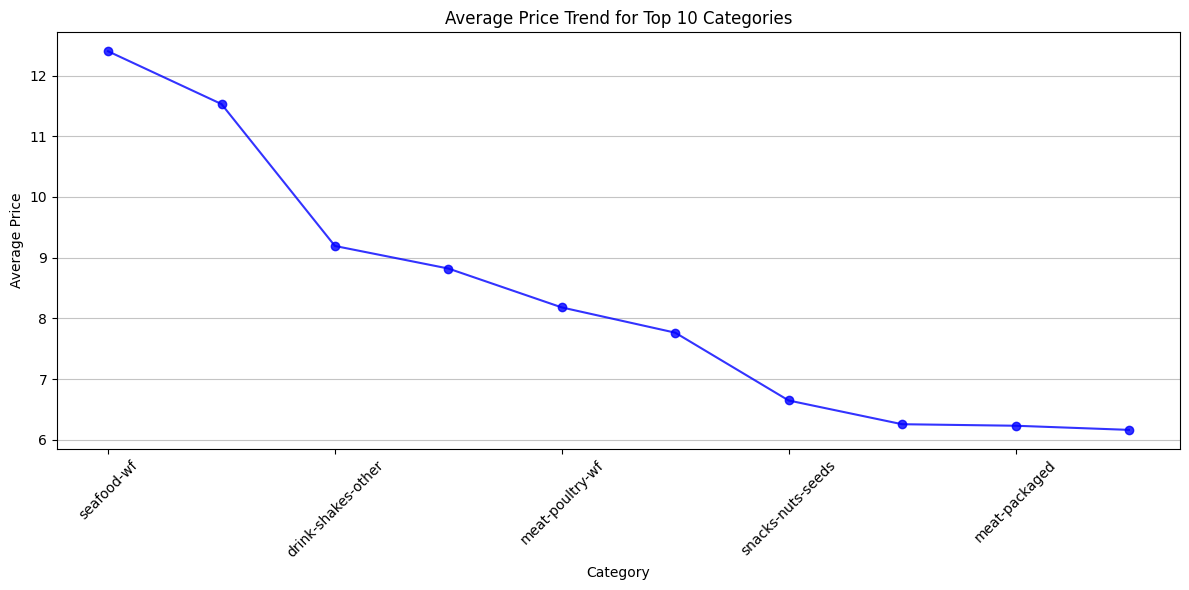

In [6]:
# Select the top 10 categories with the highest average prices
top_10_categories = avg_price_by_category.head(10)

# Plot the average price trend for these categories
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='line', marker='o', color='blue', alpha=0.8)
plt.title('Average Price Trend for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [9]:
n = 60
prod = 1

for i in range(n):
    prod *= (365 - i + 1)/365

print(f"Probability of at least two people sharing a birthday in a group of {n} people: {1 - prod:.2%}")

Probability of at least two people sharing a birthday in a group of 60 people: 99.30%


In [4]:
prod

0.007029758572819126

In [11]:
import numpy as np

def is_within_semi_circle(angles):
    """Check if all 3 angles lie within a semicircle."""
    angles = np.sort(angles)
    # Check arc lengths between each triplet
    for i in range(3):
        a = angles[i]
        b = angles[(i+1)%3]
        c = angles[(i+2)%3]

        # Compute angular distance from a to c going clockwise
        arc = (c - a) % (2 * np.pi)
        if arc <= np.pi:
            return True
    return False

def simulate(n_trials=10000000):
    count = 0
    for _ in range(n_trials):
        angles = np.random.uniform(0, 2*np.pi, 3)
        if is_within_semi_circle(angles):
            count += 1
    return count / n_trials

# Run simulation
estimated_probability = simulate()
print(f"Estimated probability that 3 points lie within a semicircle: {estimated_probability:.4f}")


Estimated probability that 3 points lie within a semicircle: 0.7497
